# Gary Kelly - C16380531
## Data Visualization Assignment: ATP and WTA tournament dataset (Wrangling)

In [1]:
#install.packages("dplyr")
#install.packages("tidyverse")

In [2]:
library(dplyr)
library(tidyverse)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v stringr 1.4.0
v tidyr   1.0.2     v forcats 0.4.0
v readr   1.3.1     
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Kaggle Datasets
These datasets were obtained from Kaggle and can be downloaded at https://www.kaggle.com/hakeem/atp-and-wta-tennis-data/data#.

The link above contains two datasets – df_atp.csv and df_wta.csv. These datasets store the ATP and WTA match results and betting odds from year 2000 until 2019. The ATP dataset contains match results dating back to January 2000 and betting odds dating back to 2001. The WTA dataset contains match results and betting odds from 2007 onwards.

In [3]:
#Read in Datasets
atpdf = read.csv('Data/df_atp.csv',header=TRUE, sep=",")
wtadf = read.csv('Data/df_wta.csv',header=TRUE, sep=",")

#Ensure read was successful
tail(atpdf,2)
tail(wtadf,2)

,X,ATP,AvgL,AvgW,B.WL,B.WW,B365L,B365W,Best.of,CBL,...,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
54907,54906,66,2.06,1.78,NA,NA,2.0,1.8,3,NA,...,NA,7,6,NA,NA,NA,5025,5,Thiem D.,2
54908,54907,66,1.86,1.96,NA,NA,1.8,2.0,3,NA,...,NA,6,6,7,NA,NA,4000,6,Tsitsipas S.,2


,X,AvgL,AvgW,B365L,B365W,Best.of,CBL,CBW,Comment,Court,...,UBL,UBW,W1,W2,W3,WPts,WRank,WTA,Winner,Wsets
32052,32051,2.45,1.56,2.37,1.57,3,NA,NA,Completed,Indoor,...,NA,NA,4,6,6,6476,1,58,Barty A.,2
32053,32052,2.03,1.79,2.1,1.72,3,NA,NA,Completed,Indoor,...,NA,NA,6,6,NA,6476,1,58,Barty A.,2


### Description of Kaggle datasets: 
Both of these datasets share a similar column structure and are comprised of two parts – results data and betting data. For this project none of the betting data columns were of use and so they were dropped. 

In [4]:
#Drop columns not needed in datasets - all betting columns and results of matches
drops <- c("MaxL","MaxW","AvgL","AvgW","B.WL","B.WW","B365L","B365W","CBL","CBW","Comment","EXL","EXW","GBL","GBW","IWL","IWW","UBL","UBW","LBL","LBW","SJL","SJW","SBL","SBW","PSL","PSW",
           "Lsets","L1","L2","L3","L4","L5","Wsets","W1","W2","W3","W4","W5","Loser","Winner")
atpdf <- atpdf[ , !(names(atpdf) %in% drops)]
wtadf <- wtadf[ , !(names(wtadf) %in% drops)]

#Ensure drop columns was successful
tail(atpdf,2)
tail(wtadf,2)

,X,ATP,Best.of,Court,Date,LPts,LRank,Location,Round,Series,Surface,Tournament,WPts,WRank
54907,54906,66,3,Indoor,16/11/2019,2945,7,London,Semifinals,Masters Cup,Hard,Masters Cup,5025,5
54908,54907,66,3,Indoor,17/11/2019,5025,5,London,The Final,Masters Cup,Hard,Masters Cup,4000,6


,X,Best.of,Court,Date,LPts,LRank,Location,Round,Surface,Tier,Tournament,WPts,WRank,WTA
32052,32051,3,Indoor,2019-11-02,5315,2,Shenzhen,Semifinals,Hard,Tour Championships,WTA Finals,6476,1,58
32053,32052,3,Indoor,2019-11-03,3995,8,Shenzhen,The Final,Hard,Tour Championships,WTA Finals,6476,1,58


### Reshaping the Kaggle datasets:
The following steps were taken to merge the Kaggle datasets and form the necessary columns for the final dataset:

- Select only last years tournaments

- Rename tournament id variables to match and ensure each tournament has unique id after merge

- Create new column called Type to distinguish whether a tournament is WTA or ATP

- Vertical merge the two datasets so that there is one dataset containg all tournament details

- Convert LRank and WRank columns from Factor to Numeric so that they can be used for calculating new columns

- Calculate new columns (AvgRank, AvgPoints, MinRank, MinPoints) using current column values (WRank, LRank, WPoints, LPoints)

- Horizontal merge calculated columns back to tournament dataframe

- Select columns for final dataframe

- Use unique to get one row per tournament

#### Select only last years tournaments

In [5]:
#Drop all rows where date isn't 2019 - Only one year of data is needed as tournament schedule doesn't change only dates
atpdf <- atpdf[grepl("2019", atpdf$Date, fixed = TRUE),]
wtadf <- wtadf[grepl("2019", wtadf$Date, fixed = TRUE),]

#Ensure only 2019 tournaments left in datframe
head(atpdf,2)
head(wtadf,2)

#Check number of rows to ensure no data is left later when merging
nrow(atpdf)
nrow(wtadf)

,X,ATP,Best.of,Court,Date,LPts,LRank,Location,Round,Series,Surface,Tournament,WPts,WRank
52304,52303,1,3,Outdoor,01/01/2019,974,49,Brisbane,1st Round,ATP250,Hard,Brisbane International,810,63
52305,52304,1,3,Outdoor,01/01/2019,875,57,Brisbane,1st Round,ATP250,Hard,Brisbane International,1050,40


,X,Best.of,Court,Date,LPts,LRank,Location,Round,Surface,Tier,Tournament,WPts,WRank,WTA
29587,29586,3,Outdoor,2019-01-01,1465,32,Auckland,1st Round,Hard,International,ASB Classic,1024,52,1
29588,29587,3,Outdoor,2019-01-01,610,101,Auckland,1st Round,Hard,International,ASB Classic,1058,47,1


[1] 2593

[1] 2444

#### Rename tournament id variables to match and ensure each tournament has unique id after merge

In [6]:
#Rename the variables to match and increment all of the wta tournamnent id's by the max of the atp tournament id column
atpdf <- atpdf %>% 
  rename(
    Tournament.ID = ATP,
    Tier = Series,
    )

wtadf <- wtadf %>% 
  rename(
    Tournament.ID = WTA,
    )

wtadf[,14] <- wtadf[,14] + max(atpdf$Tournament.ID)

#Ensure columns renamed successfully and tournaent id column implemented successfuly
tail(atpdf,2)
head(wtadf,2)

,X,Tournament.ID,Best.of,Court,Date,LPts,LRank,Location,Round,Tier,Surface,Tournament,WPts,WRank
54907,54906,66,3,Indoor,16/11/2019,2945,7,London,Semifinals,Masters Cup,Hard,Masters Cup,5025,5
54908,54907,66,3,Indoor,17/11/2019,5025,5,London,The Final,Masters Cup,Hard,Masters Cup,4000,6


,X,Best.of,Court,Date,LPts,LRank,Location,Round,Surface,Tier,Tournament,WPts,WRank,Tournament.ID
29587,29586,3,Outdoor,2019-01-01,1465,32,Auckland,1st Round,Hard,International,ASB Classic,1024,52,67
29588,29587,3,Outdoor,2019-01-01,610,101,Auckland,1st Round,Hard,International,ASB Classic,1058,47,67


#### Create new column called Type to distinguish whether a tournament is WTA or ATP

In [7]:
#Create new variable in each dataset to identify which tournament type it is ATP / WTA
atpdf$Type = "ATP"
wtadf$Type = "WTA"

#Ensure new variable correctly setup
tail(atpdf,2)
tail(wtadf,2)

,X,Tournament.ID,Best.of,Court,Date,LPts,LRank,Location,Round,Tier,Surface,Tournament,WPts,WRank,Type
54907,54906,66,3,Indoor,16/11/2019,2945,7,London,Semifinals,Masters Cup,Hard,Masters Cup,5025,5,ATP
54908,54907,66,3,Indoor,17/11/2019,5025,5,London,The Final,Masters Cup,Hard,Masters Cup,4000,6,ATP


,X,Best.of,Court,Date,LPts,LRank,Location,Round,Surface,Tier,Tournament,WPts,WRank,Tournament.ID,Type
32052,32051,3,Indoor,2019-11-02,5315,2,Shenzhen,Semifinals,Hard,Tour Championships,WTA Finals,6476,1,124,WTA
32053,32052,3,Indoor,2019-11-03,3995,8,Shenzhen,The Final,Hard,Tour Championships,WTA Finals,6476,1,124,WTA


#### Vertical merge the two datasets so that there is one dataset containg all tournament details

In [8]:
#Merge atp and wta datastes vertically
tennisTournaments <- rbind(atpdf,wtadf)

#Ensure merge was successful and data wasn't lost in rbind (5037 == 2593 + 2444)
head(tennisTournaments,2)
nrow(tennisTournaments)

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(32, 101, 90, 49, 85, 190, :
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, ri, value = c(52, 47, 33, 174, 28, 77, :
"invalid factor level, NA generated"

,X,Tournament.ID,Best.of,Court,Date,LPts,LRank,Location,Round,Tier,Surface,Tournament,WPts,WRank,Type
52304,52303,1,3,Outdoor,01/01/2019,974,49,Brisbane,1st Round,ATP250,Hard,Brisbane International,810,63,ATP
52305,52304,1,3,Outdoor,01/01/2019,875,57,Brisbane,1st Round,ATP250,Hard,Brisbane International,1050,40,ATP


[1] 5037

#### Convert LRank and WRank columns from Factor to Numeric so that they can be used for calculating new columns

In [9]:
#View col types
str(tennisTournaments)

#Check values of LRank and WRank pre changing type
head(tennisTournaments[tennisTournaments$Tournament == "Wimbledon", ],5)

#Alter both rank columns to be numeric as they will be used for a calculation - used as chahracter to ensure values are correctly converted
tennisTournaments$LRank <- as.numeric(as.character(tennisTournaments$LRank))
tennisTournaments$WRank <- as.numeric(as.character(tennisTournaments$WRank))

#View col types again to ensure change was successful
str(tennisTournaments)

#Check values of LRank and WRank post changing to ensure data wasn't altered
head(tennisTournaments[tennisTournaments$Tournament == "Wimbledon", ],5)

'data.frame':	5037 obs. of  15 variables:
 $ X            : int  52303 52304 52305 52306 52307 52308 52309 52310 52311 52312 ...
 $ Tournament.ID: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Best.of      : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Court        : Factor w/ 2 levels "Indoor","Outdoor": 2 2 2 2 2 2 2 2 2 2 ...
 $ Date         : Factor w/ 8526 levels "01/01/2001","01/01/2003",..: 10 10 10 10 10 10 10 172 172 172 ...
 $ LPts         : num  974 875 206 810 367 ...
 $ LRank        : Factor w/ 947 levels "","1","10","100",..: 562 646 281 693 156 159 178 442 141 703 ...
 $ Location     : Factor w/ 172 levels "'s-Hertogenbosch",..: 18 18 18 18 18 18 18 18 18 18 ...
 $ Round        : Factor w/ 9 levels "1st Round","2nd Round",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Tier         : Factor w/ 16 levels "ATP250","ATP500",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Surface      : Factor w/ 5 levels "Carpet","Clay",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Tournament   : Factor w/ 354 levels "AAPT Championships",..: 36 36 36 36 36 36 36 36

,X,Tournament.ID,Best.of,Court,Date,LPts,LRank,Location,Round,Tier,Surface,Tournament,WPts,WRank,Type
53801,53800,39,5,Outdoor,01/07/2019,776,68,London,1st Round,Grand Slam,Grass,Wimbledon,125,288,ATP
53802,53801,39,5,Outdoor,01/07/2019,1143,39,London,1st Round,Grand Slam,Grass,Wimbledon,3610,8,ATP
53803,53802,39,5,Outdoor,01/07/2019,356,155,London,1st Round,Grand Slam,Grass,Wimbledon,917,54,ATP
53804,53803,39,5,Outdoor,01/07/2019,465,121,London,1st Round,Grand Slam,Grass,Wimbledon,1600,22,ATP
53805,53804,39,5,Outdoor,01/07/2019,10,518,London,1st Round,Grand Slam,Grass,Wimbledon,855,63,ATP


'data.frame':	5037 obs. of  15 variables:
 $ X            : int  52303 52304 52305 52306 52307 52308 52309 52310 52311 52312 ...
 $ Tournament.ID: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Best.of      : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Court        : Factor w/ 2 levels "Indoor","Outdoor": 2 2 2 2 2 2 2 2 2 2 ...
 $ Date         : Factor w/ 8526 levels "01/01/2001","01/01/2003",..: 10 10 10 10 10 10 10 172 172 172 ...
 $ LPts         : num  974 875 206 810 367 ...
 $ LRank        : num  49 57 234 62 146 147 154 38 14 63 ...
 $ Location     : Factor w/ 172 levels "'s-Hertogenbosch",..: 18 18 18 18 18 18 18 18 18 18 ...
 $ Round        : Factor w/ 9 levels "1st Round","2nd Round",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Tier         : Factor w/ 16 levels "ATP250","ATP500",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Surface      : Factor w/ 5 levels "Carpet","Clay",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Tournament   : Factor w/ 354 levels "AAPT Championships",..: 36 36 36 36 36 36 36 36 36 36 ...
 $ WPts         : num  810 1050 2

,X,Tournament.ID,Best.of,Court,Date,LPts,LRank,Location,Round,Tier,Surface,Tournament,WPts,WRank,Type
53801,53800,39,5,Outdoor,01/07/2019,776,68,London,1st Round,Grand Slam,Grass,Wimbledon,125,288,ATP
53802,53801,39,5,Outdoor,01/07/2019,1143,39,London,1st Round,Grand Slam,Grass,Wimbledon,3610,8,ATP
53803,53802,39,5,Outdoor,01/07/2019,356,155,London,1st Round,Grand Slam,Grass,Wimbledon,917,54,ATP
53804,53803,39,5,Outdoor,01/07/2019,465,121,London,1st Round,Grand Slam,Grass,Wimbledon,1600,22,ATP
53805,53804,39,5,Outdoor,01/07/2019,10,518,London,1st Round,Grand Slam,Grass,Wimbledon,855,63,ATP


#### Calculate new columns (AvgRank, AvgPoints, MinRank, MinPoints) using current column values (WRank, LRank, WPoints, LPoints)

In [10]:
#Print London ATP Finals data for checking calculated columns are correctly calculated
tennisTournaments[tennisTournaments$Tournament.ID == 66, ]

#Calculate new columns to be used in final dataset - AvgPoints, AvgRank, NumRounds, MinPoints and MinRank
calculatedColumns <- tennisTournaments[tennisTournaments$Round == "1st Round" || tennisTournaments$Round == "Round Robin", ]  %>% group_by(Tournament.ID) %>% summarise(AvgPts = (mean(LPts, na.rm = TRUE) + mean(WPts, na.rm = TRUE)) %/% 2, AvgRank = (mean(LRank, na.rm = TRUE) + mean(WRank, na.rm = TRUE)) %/% 2, NumRounds = length(unique(Round)), MinPoints = min(min(LPts, na.rm = TRUE),min(WPts, na.rm = TRUE)), MinRank = max(max(LRank, na.rm = TRUE),max(WRank, na.rm = TRUE)))

#Ensure columns are calculated correctly using London ATP Finals
calculatedColumns[calculatedColumns$Tournament.ID == 66, ]

,X,Tournament.ID,Best.of,Court,Date,LPts,LRank,Location,Round,Tier,Surface,Tournament,WPts,WRank,Type
54894,54893,66,3,Indoor,10/11/2019,2670,8,London,Round Robin,Masters Cup,Hard,Masters Cup,8945,2,ATP
54895,54894,66,3,Indoor,10/11/2019,6190,3,London,Round Robin,Masters Cup,Hard,Masters Cup,5025,5,ATP
54896,54895,66,3,Indoor,11/11/2019,5705,4,London,Round Robin,Masters Cup,Hard,Masters Cup,4000,6,ATP
54897,54896,66,3,Indoor,11/11/2019,9585,1,London,Round Robin,Masters Cup,Hard,Masters Cup,2945,7,ATP
54898,54897,66,3,Indoor,12/11/2019,2670,8,London,Round Robin,Masters Cup,Hard,Masters Cup,6190,3,ATP
54899,54898,66,3,Indoor,12/11/2019,8945,2,London,Round Robin,Masters Cup,Hard,Masters Cup,5025,5,ATP
54900,54899,66,3,Indoor,13/11/2019,5705,4,London,Round Robin,Masters Cup,Hard,Masters Cup,9585,1,ATP
54901,54900,66,3,Indoor,13/11/2019,2945,7,London,Round Robin,Masters Cup,Hard,Masters Cup,4000,6,ATP
54902,54901,66,3,Indoor,14/11/2019,5025,5,London,Round Robin,Masters Cup,Hard,Masters Cup,2670,8,ATP
54903,54902,66,3,Indoor,14/11/2019,8945,2,London,Round Robin,Masters Cup,Hard,Masters Cup,6190,3,ATP


Tournament.ID,AvgPts,AvgRank,NumRounds,MinPoints,MinRank
66,5412,4,3,2670,8


#### Horizontal merge calculated columns back to tournament dataframe

In [11]:
#Merge newly calculated columns to full tournament dataset
merged_result <- merge(tennisTournaments,calculatedColumns, by=c("Tournament.ID"))

#Ensure no data was lost in merge
head(merged_result,2)
nrow(merged_result)

Tournament.ID,X,Best.of,Court,Date,LPts,LRank,Location,Round,Tier,Surface,Tournament,WPts,WRank,Type,AvgPts,AvgRank,NumRounds,MinPoints,MinRank
1,52303,3,Outdoor,01/01/2019,974,49,Brisbane,1st Round,ATP250,Hard,Brisbane International,810,63,ATP,1206,83,5,200,240
1,52304,3,Outdoor,01/01/2019,875,57,Brisbane,1st Round,ATP250,Hard,Brisbane International,1050,40,ATP,1206,83,5,200,240


[1] 5037

#### Select columns for final dataframe

In [12]:
#Only select columns needed for tournament - drop all match details ie date, LPts, LRank etc
finaldf <- merged_result %>% select(Tournament.ID, Best.of,Court,Location,Tier,Surface,Tournament,Type,AvgPts,AvgRank,NumRounds,MinPoints,MinRank)

#Ensure selected columns are correct
head(finaldf,2)

Tournament.ID,Best.of,Court,Location,Tier,Surface,Tournament,Type,AvgPts,AvgRank,NumRounds,MinPoints,MinRank
1,3,Outdoor,Brisbane,ATP250,Hard,Brisbane International,ATP,1206,83,5,200,240
1,3,Outdoor,Brisbane,ATP250,Hard,Brisbane International,ATP,1206,83,5,200,240


#### Use unique to get one row per tournament

In [13]:
#Get one row for each tournament and set tournament id as row index
finaldf <- unique(finaldf)
rownames(finaldf) <- finaldf$Tournament.ID

#Check number of tournaments and that format is correct
head(finaldf,2)
nrow(finaldf)

Tournament.ID,Best.of,Court,Location,Tier,Surface,Tournament,Type,AvgPts,AvgRank,NumRounds,MinPoints,MinRank
1,3,Outdoor,Brisbane,ATP250,Hard,Brisbane International,ATP,1206,83,5,200,240
2,3,Outdoor,Doha,ATP250,Hard,Qatar Exxon Mobil Open,ATP,1833,51,5,183,249


[1] 124

### Scraped Datasets
These datasets were scraped from the ATP and WTA tournament websites https://www.atptour.com/en/tournaments and https://www.wtatennis.com/tournaments. More information on how these datasets were scraped can be found in the project document.

In [14]:
#Read in datasets
ATP_prize_money = read.csv('Data/ATP_prize_money.csv',header=TRUE, sep=",", stringsAsFactors = FALSE)
WTA_prize_money = read.csv('Data/WTA_prize_money.csv',header=TRUE, sep=",", stringsAsFactors = FALSE)

#Ensure datasets were successfully read in
head(ATP_prize_money,2)
head(WTA_prize_money,2)

Tournament,startDate,endDate,prizeMoney,prizeMoneyCurrency
ATP Cup,2020/01/03,2020/01/12,"15,000,000",USD
Qatar ExxonMobil Open,2020/01/06,2020/01/11,"1,465,260",USD


tournamentGroup,year,title,startDate,endDate,surface,inOutdoor,city,country,singlesDrawSize,doublesDrawSize,prizeMoney,prizeMoneyCurrency,liveScoringId
"{'id': 1063, 'name': 'SHENZHEN', 'level': 'International', 'metadata': None}",2020,Shenzhen Open - China,05/01/2020,11/01/2020,Hard,O,SHENZHEN,CHINA,32,16,651750,USD,1063
"{'id': 1049, 'name': 'AUCKLAND', 'level': 'International', 'metadata': None}",2020,"ASB Classic 2020 - Auckland, New Zealand",06/01/2020,12/01/2020,Hard,O,AUCKLAND,NEW ZEALAND,32,16,251750,USD,1049


### Description of Scraped datasets: 
Both of these datasets share a similar column structure with 5 shared columns.The WTA scraped dataset has some additional information like location data and court data which is already contained in my Kaggle dataset so will be dropped

In [15]:
#Only select columns needed for tournament - drop all match details ie date, LPts, LRank etc
WTA_prize_money <- WTA_prize_money %>% select(title, startDate,endDate,prizeMoney,prizeMoneyCurrency)

#Ensure selected columns are correct
head(WTA_prize_money,2)

title,startDate,endDate,prizeMoney,prizeMoneyCurrency
Shenzhen Open - China,05/01/2020,11/01/2020,651750,USD
"ASB Classic 2020 - Auckland, New Zealand",06/01/2020,12/01/2020,251750,USD


### Reshaping the Scraped datasets:
The following steps were taken to merge the Scraped datasets and form the necessary columns for the final dataset:

- Create new column called Type to distinguish whether a tournament is WTA or ATP

- Reformat the title column from 'Tournament - Location' to just 'Tournament'

- Change format of date variables to Date

- Rename title column to match ATP Tournamet column

- Vertical merge the scraped datasets

- Use Tournament Index to merge Scraped datasets with Kaggle Datasets

- Drop columns only needed for merge

#### Create new column called Type to distinguish whether a tournament is WTA or ATP

In [16]:
#Create new variable in each dataset to identify which tournament type it is ATP / WTA
ATP_prize_money$Type = "ATP"
WTA_prize_money$Type = "WTA"

#Ensure new variable correctly setup
head(ATP_prize_money,2)
head(WTA_prize_money,2)

Tournament,startDate,endDate,prizeMoney,prizeMoneyCurrency,Type
ATP Cup,2020/01/03,2020/01/12,"15,000,000",USD,ATP
Qatar ExxonMobil Open,2020/01/06,2020/01/11,"1,465,260",USD,ATP


title,startDate,endDate,prizeMoney,prizeMoneyCurrency,Type
Shenzhen Open - China,05/01/2020,11/01/2020,651750,USD,WTA
"ASB Classic 2020 - Auckland, New Zealand",06/01/2020,12/01/2020,251750,USD,WTA


#### Reformat the title column from 'Tournament - Location' to just 'Tournament'

In [17]:
WTA_prize_money$title <- sapply(str_split(WTA_prize_money$title, "-", n = Inf, simplify = FALSE), `[`, 1)
head(WTA_prize_money,2)

title,startDate,endDate,prizeMoney,prizeMoneyCurrency,Type
Shenzhen Open,05/01/2020,11/01/2020,651750,USD,WTA
ASB Classic 2020,06/01/2020,12/01/2020,251750,USD,WTA


#### Change format of date variables to Date

In [18]:
str(ATP_prize_money)
str(WTA_prize_money)
ATP_prize_money$startDate <- as.Date(ATP_prize_money$startDate, format = "%Y/%m/%d")
ATP_prize_money$endDate <- as.Date(ATP_prize_money$endDate, format = "%Y/%m/%d")
WTA_prize_money$startDate <- as.Date(WTA_prize_money$startDate, format = "%d/%m/%Y")
WTA_prize_money$endDate <- as.Date(WTA_prize_money$endDate, format = "%d/%m/%Y")
ATP_prize_money$prizeMoney <- as.integer(gsub(",", "", (ATP_prize_money$prizeMoney)))
str(ATP_prize_money)
str(WTA_prize_money)

'data.frame':	73 obs. of  6 variables:
 $ Tournament        : chr  "ATP Cup" "Qatar ExxonMobil Open" "Adelaide International" "ASB Classic" ...
 $ startDate         : chr  "2020/01/03" "2020/01/06" "2020/01/12" "2020/01/13" ...
 $ endDate           : chr  "2020/01/12" "2020/01/11" "2020/01/18" "2020/01/18" ...
 $ prizeMoney        : chr  "15,000,000" "1,465,260" "610,010" "610,010" ...
 $ prizeMoneyCurrency: chr  "USD" "USD" "USD" "USD" ...
 $ Type              : chr  "ATP" "ATP" "ATP" "ATP" ...
'data.frame':	69 obs. of  6 variables:
 $ title             : chr  "Shenzhen Open " "ASB Classic 2020 " "Brisbane International " "Hobart International " ...
 $ startDate         : chr  "05/01/2020" "06/01/2020" "06/01/2020" "13/01/2020" ...
 $ endDate           : chr  "11/01/2020" "12/01/2020" "12/01/2020" "18/01/2020" ...
 $ prizeMoney        : int  651750 251750 1434900 251750 782900 22756069 162480 782900 251750 2643670 ...
 $ prizeMoneyCurrency: chr  "USD" "USD" "USD" "USD" ...
 $ Type    

#### Rename title column to match ATP Tournamet column

In [19]:
#Rename the variables to match and increment all of the wta tournamnent id's by the max of the atp tournament id column
WTA_prize_money <- WTA_prize_money %>% 
  rename(
    Tournament = title,
    )

#Ensure selected columns are correct
head(WTA_prize_money,2)

Tournament,startDate,endDate,prizeMoney,prizeMoneyCurrency,Type
Shenzhen Open,2020-01-05,2020-01-11,651750,USD,WTA
ASB Classic 2020,2020-01-06,2020-01-12,251750,USD,WTA


#### Vertical merge the scraped datasets

In [20]:
prize_money <- rbind(ATP_prize_money,WTA_prize_money)
head(prize_money,2)
nrow(prize_money)

Tournament,startDate,endDate,prizeMoney,prizeMoneyCurrency,Type
ATP Cup,2020-01-03,2020-01-12,15000000,USD,ATP
Qatar ExxonMobil Open,2020-01-06,2020-01-11,1465260,USD,ATP


[1] 142

In [21]:
#Write files to be used in the TournamentIndex.py program. Code can be seen in the project document
write.csv(finaldf,"Data/finaldf.csv", row.names = FALSE)
write.csv(prize_money,"Data/prize_money.csv", row.names = FALSE)

### Tournament Index Dataset
This dataset was generated using python code to match the Tournament names in the finaldf.csv to the Tournament names in the prize_money.csv. The code for generating this dataset is shown in the document. This dataset is used to succesfully merge the two datests using the Tournament name and tournament type variables. 

In [22]:
#Read in tournament index dataset
TournamentNames = read.csv('Data/tournamentIndex.csv',header=TRUE, sep=",")

#Ensure it was read in correctly
tail(TournamentNames,5)

,Tournament,title,Type
110,Generali Ladies Linz,Upper Austria Ladies Linz,WTA
111,Toray Pan Pacific Open Tennis Tournament,Toray Pan Pacific Open,WTA
112,Grand Prix SAR Lalla Meryem,Grand Prix De SAR La Princesse Lalla Meryem,WTA
113,Rosmalen Grass Court Championships,Libema Open (Suspended),ATP
114,Rosmalen Grass Court Championships,Libema Open,WTA


#### Merge Tournament Index with Kaggle datasets

In [23]:
#Merge new tournament name to dataset in order to succesfully merge the FullTournaments and prize_money datasets
FullTournaments <- merge(finaldf,TournamentNames, by=c("Tournament","Type"), all.x = TRUE, all.y = FALSE)

#ensure no data lost in merge -nrow should stay at 124
head(FullTournaments,2)
nrow(FullTournaments)

#Check for NaNs - Some tournaments discontinued in 2019 so don't have a tournaments in 2020 - 11 rows
FullTournaments[!complete.cases(FullTournaments),]

FullTournaments <- FullTournaments[complete.cases(FullTournaments),]

Tournament,Type,Tournament.ID,Best.of,Court,Location,Tier,Surface,AvgPts,AvgRank,NumRounds,MinPoints,MinRank,title
Abierto Mexicano,ATP,16,3,Outdoor,Acapulco,ATP500,Hard,1703,65,5,7,552,Abierto Mexicano Telcel presentado por HSBC
Abierto Mexicano,WTA,78,3,Outdoor,Acapulco,International,Clay,1082,79,5,234,242,Abierto Mexicano TELCEL presentado por HSBC


[1] 124

,Tournament,Type,Tournament.ID,Best.of,Court,Location,Tier,Surface,AvgPts,AvgRank,NumRounds,MinPoints,MinRank,title
5,Antalya Open,ATP,37,3,Outdoor,Antalya,ATP250,Grass,611,127,5,6,566,NA
16,Brasil Open,ATP,18,3,Indoor,Sao Paulo,ATP250,Clay,665,104,5,19,449,NA
47,Mallorca Open,WTA,97,3,Outdoor,Mallorca,International,Grass,1663,64,5,116,358,NA
68,Samsung Open,WTA,84,3,Outdoor,Lugano,International,Clay,689,107,5,80,413,NA
71,SkiStar Swedish Open,ATP,40,3,Outdoor,Bastad,ATP250,Clay,696,91,5,196,235,NA
79,Sydney International,ATP,5,3,Outdoor,Sydney,ATP250,Hard,1017,55,5,206,238,NA
80,Sydney International,WTA,71,3,Outdoor,Sydney,Premier,Hard,2552,38,5,307,192,NA
93,Bronx Open,WTA,108,3,Outdoor,New York,International,Hard,989,75,5,79,466,NA
102,Hungarian Ladies Open,WTA,76,3,Indoor,Budapest,International,Hard,673,106,5,34,547,NA
105,Istanbul Cup,WTA,85,3,Outdoor,Istanbul,International,Clay,875,82,5,211,256,NA


#### Use Tournament Index to merge Scraped datasets with Kaggle datasets

In [24]:
#Merge datasets
FullTournaments <- merge(FullTournaments,prize_money, by = c("Type"),by.x=c("title"),
    by.y=c("Tournament"), all.x = TRUE, all.y = FALSE)

#check no data lost
nrow(FullTournaments)

#check that type.x and type.y variables are the same before dropping
check <- FullTournaments %>% filter(FullTournaments$Type.x != FullTournaments$Type.y)
check
nrow(check)

#Check no tournament has been given duplicate values
n_occur <- data.frame(table(FullTournaments$title))
n_occur[n_occur$Freq > 1,]

[1] 113

title,Tournament,Type.x,Tournament.ID,Best.of,Court,Location,Tier,Surface,AvgPts,AvgRank,NumRounds,MinPoints,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,Type.y


[1] 0

Var1,Freq


#### Drop columns only needed for merge

In [25]:
#Drop columns not needed in datasets - all betting columns and results of matches
drops <- c("title","Type.y")
FullTournaments <- FullTournaments[ , !(names(FullTournaments) %in% drops)]

head(FullTournaments,2)
nrow(FullTournaments)

sum(is.na(FullTournaments$prizeMoney))
sum(is.na(FullTournaments$startDate))

Tournament,Type.x,Tournament.ID,Best.of,Court,Location,Tier,Surface,AvgPts,AvgRank,NumRounds,MinPoints,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency
Wuhan Open,WTA,117,3,Outdoor,Wuhan,Premier,Hard,2155,36,6,468,136,2020-09-27,2020-10-03,0,USD
US Open,WTA,109,3,Outdoor,New York,Grand Slam,Hard,1797,63,7,1,469,2020-08-31,2020-09-12,0,USD


[1] 113

[1] 1

[1] 1

### Location Dataset
This dataset was accessed from https://simplemaps.com/data/world-cities. 

This dataset was used to gain further geographic data on the locations of each tournament for mapping. The dataset contains a list of about 15 thousand prominent cities. 

In [26]:
locations = read.csv('Data/worldcities.csv',header=TRUE, sep=",")

head(locations,2)

city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,TÅkyÅ,primary,35676000,1392685764
New York,New York,40.6943,-73.9249,United States,US,USA,New York,,19354922,1840034016


#### Description of Dataset
The original dataset contains 11 columns but only 6 of these were relevant for the final dataset. 

In [27]:
#Only select columns needed for tournament - drop all match details ie date, LPts, LRank etc
locations <- locations %>% select(city,city_ascii,lat,lng,country,population)

#Ensure selected columns are correct
head(locations,2)

city,city_ascii,lat,lng,country,population
Tokyo,Tokyo,35.6850,139.7514,Japan,35676000
New York,New York,40.6943,-73.9249,United States,19354922


In [28]:
#Merge location dataset to final dataset
FullTournaments <- merge(FullTournaments,locations, by.x=c("Location"),
    by.y=c("city_ascii"), all.x = TRUE, all.y = FALSE)

FullTournaments

Location,Tournament,Type.x,Tournament.ID,Best.of,Court,Tier,Surface,AvgPts,AvgRank,...,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,city,lat,lng,country,population
's-Hertogenbosch,Rosmalen Grass Court Championships,WTA,94,3,Outdoor,International,Grass,1186,85,...,214,2020-06-08,2020-06-14,251750,USD,â€™s-Hertogenbosch,51.6833,5.3167,Netherlands,134520
's-Hertogenbosch,Rosmalen Grass Court Championships,ATP,33,3,Outdoor,ATP250,Grass,1060,61,...,224,2020-06-08,2020-06-14,735790,EUR,â€™s-Hertogenbosch,51.6833,5.3167,Netherlands,134520
Acapulco,Abierto Mexicano,WTA,78,3,Outdoor,International,Clay,1082,79,...,242,2020-02-24,2020-02-29,251750,USD,Acapulco,16.8531,99.8237,Mexico,"673,479"
Acapulco,Abierto Mexicano,ATP,16,3,Outdoor,ATP500,Hard,1703,65,...,552,2020-02-24,2020-02-29,2000845,USD,Acapulco,16.8531,99.8237,Mexico,"673,479"
Antwerp,European Open,ATP,60,3,Indoor,ATP250,Hard,923,83,...,243,2020-10-19,2020-10-25,735790,EUR,Antwerp,51.2204,4.4150,Belgium,920000
Atlanta,BB&T Atlanta Open,ATP,43,3,Outdoor,ATP250,Hard,856,81,...,405,2020-07-27,2020-08-02,804180,USD,Atlanta,33.1136,-94.1672,United States,5541
Atlanta,BB&T Atlanta Open,ATP,43,3,Outdoor,ATP250,Hard,856,81,...,405,2020-07-27,2020-08-02,804180,USD,Atlanta,33.7627,-84.4225,United States,5228750
Auckland,ASB Classic,ATP,4,3,Outdoor,ATP250,Hard,970,69,...,360,2020-01-13,2020-01-18,610010,USD,Auckland,-36.8481,174.7630,New Zealand,1377200
Auckland,ASB Classic,WTA,67,3,Outdoor,International,Hard,1258,74,...,190,2020-01-06,2020-01-12,251750,USD,Auckland,-36.8481,174.7630,New Zealand,1377200
Barcelona,Open Banco Sabadell,ATP,24,3,Outdoor,ATP500,Clay,1737,54,...,276,2020-04-20,2020-04-26,2803265,EUR,Barcelona,10.1304,-64.7200,Venezuela,600954


In [29]:
#Check for NaNs
FullTournaments[!complete.cases(FullTournaments),]

,Location,Tournament,Type.x,Tournament.ID,Best.of,Court,Tier,Surface,AvgPts,AvgRank,...,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,city,lat,lng,country,population
15,Bogota,Copa Claro Colsanitas,WTA,83,3,Outdoor,International,Clay,480,163,...,574,NA,NA,NA,NA,Bogota,40.8751,-74.0293,United States,8567
16,Bogota,Copa Claro Colsanitas,WTA,83,3,Outdoor,International,Clay,480,163,...,574,NA,NA,NA,NA,BogotÃ¡,4.5964,-74.0833,Colombia,7772000
32,Dubai,Dubai Tennis Championships,ATP,17,3,Outdoor,ATP500,Hard,1683,51,...,218,2020-02-24,2020-02-29,2950420,USD,NA,NA,NA,NA,NA


In [30]:
str(FullTournaments)

#Change column types to int / factor for visualizations
FullTournaments$Type.x <- as.factor(FullTournaments$Type.x)
FullTournaments$prizeMoneyCurrency <- as.factor(FullTournaments$prizeMoneyCurrency)
FullTournaments$AvgPts <- as.integer(FullTournaments$AvgPts)
FullTournaments$AvgRank <- as.integer(FullTournaments$AvgRank)
FullTournaments$MinPoints <- as.integer(FullTournaments$MinPoints)
FullTournaments$MinRank <- as.integer(FullTournaments$MinRank)
FullTournaments$population <- as.integer(as.character(FullTournaments$population))

str(FullTournaments)

'data.frame':	200 obs. of  22 variables:
 $ Location          : Factor w/ 172 levels "'s-Hertogenbosch",..: 1 1 2 2 7 8 8 9 9 11 ...
 $ Tournament        : Factor w/ 354 levels "AAPT Championships",..: 175 175 2 2 74 25 25 15 15 144 ...
 $ Type.x            : chr  "WTA" "ATP" "WTA" "ATP" ...
 $ Tournament.ID     : int  94 33 78 16 60 43 43 4 67 24 ...
 $ Best.of           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Court             : Factor w/ 2 levels "Indoor","Outdoor": 2 2 2 2 1 2 2 2 2 2 ...
 $ Tier              : Factor w/ 16 levels "ATP250","ATP500",..: 4 1 4 2 1 1 1 1 4 2 ...
 $ Surface           : Factor w/ 5 levels "Carpet","Clay",..: 3 3 2 4 4 4 4 4 4 2 ...
 $ AvgPts            : num  1186 1060 1082 1703 923 ...
 $ AvgRank           : num  85 61 79 65 83 81 81 69 74 54 ...
 $ NumRounds         : int  5 5 5 5 5 5 5 5 5 6 ...
 $ MinPoints         : num  266 220 234 7 192 34 34 56 308 152 ...
 $ MinRank           : num  214 224 242 552 243 405 405 360 190 276 ...
 $ startDate         : D

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

'data.frame':	200 obs. of  22 variables:
 $ Location          : Factor w/ 172 levels "'s-Hertogenbosch",..: 1 1 2 2 7 8 8 9 9 11 ...
 $ Tournament        : Factor w/ 354 levels "AAPT Championships",..: 175 175 2 2 74 25 25 15 15 144 ...
 $ Type.x            : Factor w/ 2 levels "ATP","WTA": 2 1 2 1 1 1 1 1 2 1 ...
 $ Tournament.ID     : int  94 33 78 16 60 43 43 4 67 24 ...
 $ Best.of           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Court             : Factor w/ 2 levels "Indoor","Outdoor": 2 2 2 2 1 2 2 2 2 2 ...
 $ Tier              : Factor w/ 16 levels "ATP250","ATP500",..: 4 1 4 2 1 1 1 1 4 2 ...
 $ Surface           : Factor w/ 5 levels "Carpet","Clay",..: 3 3 2 4 4 4 4 4 4 2 ...
 $ AvgPts            : int  1186 1060 1082 1703 923 856 856 970 1258 1737 ...
 $ AvgRank           : int  85 61 79 65 83 81 81 69 74 54 ...
 $ NumRounds         : int  5 5 5 5 5 5 5 5 5 6 ...
 $ MinPoints         : int  266 220 234 7 192 34 34 56 308 152 ...
 $ MinRank           : int  214 224 242 552 243 405

In [31]:
#For locations that have multiple countries eg Melbourne Australian and US use location with higher population
FullTournaments[FullTournaments$Tournament == "Australian Open", ]

FullTournaments <- FullTournaments %>% 
    group_by(Tournament,Type.x) %>% 
    filter(population==max(population))

nrow(FullTournaments)

FullTournaments[FullTournaments$Tournament == "Australian Open", ]

,Location,Tournament,Type.x,Tournament.ID,Best.of,Court,Tier,Surface,AvgPts,AvgRank,...,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,city,lat,lng,country,population
66,Melbourne,Australian Open,ATP,6,5,Outdoor,Grand Slam,Hard,1788,60,...,321,2020-01-20,2020-02-03,32505000,AUD,Melbourne,-37.8200,144.9750,Australia,4170000
67,Melbourne,Australian Open,ATP,6,5,Outdoor,Grand Slam,Hard,1788,60,...,321,2020-01-20,2020-02-03,32505000,AUD,Melbourne,28.1085,-80.6627,United States,82011
68,Melbourne,Australian Open,WTA,72,3,Outdoor,Grand Slam,Hard,1934,61,...,551,2020-01-20,2020-02-02,22756069,USD,Melbourne,-37.8200,144.9750,Australia,4170000
69,Melbourne,Australian Open,WTA,72,3,Outdoor,Grand Slam,Hard,1934,61,...,551,2020-01-20,2020-02-02,22756069,USD,Melbourne,28.1085,-80.6627,United States,82011


[1] 106

Location,Tournament,Type.x,Tournament.ID,Best.of,Court,Tier,Surface,AvgPts,AvgRank,...,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,city,lat,lng,country,population
Melbourne,Australian Open,ATP,6,5,Outdoor,Grand Slam,Hard,1788,60,...,321,2020-01-20,2020-02-03,32505000,AUD,Melbourne,-37.82,144.975,Australia,4170000
Melbourne,Australian Open,WTA,72,3,Outdoor,Grand Slam,Hard,1934,61,...,551,2020-01-20,2020-02-02,22756069,USD,Melbourne,-37.82,144.975,Australia,4170000


In [32]:
FullTournaments <- unique(FullTournaments)
nrow(FullTournaments)

[1] 106

In [33]:
#View entire dataframe
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

FullTournaments

Location,Tournament,Type.x,Tournament.ID,Best.of,Court,Tier,Surface,AvgPts,AvgRank,NumRounds,MinPoints,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,city,lat,lng,country,population
's-Hertogenbosch,Rosmalen Grass Court Championships,WTA,94,3,Outdoor,International,Grass,1186,85,5,266,214,2020-06-08,2020-06-14,251750,USD,â€™s-Hertogenbosch,51.6833,5.3167,Netherlands,134520
's-Hertogenbosch,Rosmalen Grass Court Championships,ATP,33,3,Outdoor,ATP250,Grass,1060,61,5,220,224,2020-06-08,2020-06-14,735790,EUR,â€™s-Hertogenbosch,51.6833,5.3167,Netherlands,134520
Antwerp,European Open,ATP,60,3,Indoor,ATP250,Hard,923,83,5,192,243,2020-10-19,2020-10-25,735790,EUR,Antwerp,51.2204,4.4150,Belgium,920000
Atlanta,BB&T Atlanta Open,ATP,43,3,Outdoor,ATP250,Hard,856,81,5,34,405,2020-07-27,2020-08-02,804180,USD,Atlanta,33.7627,-84.4225,United States,5228750
Auckland,ASB Classic,ATP,4,3,Outdoor,ATP250,Hard,970,69,5,56,360,2020-01-13,2020-01-18,610010,USD,Auckland,-36.8481,174.7630,New Zealand,1377200
Auckland,ASB Classic,WTA,67,3,Outdoor,International,Hard,1258,74,5,308,190,2020-01-06,2020-01-12,251750,USD,Auckland,-36.8481,174.7630,New Zealand,1377200
Barcelona,Open Banco Sabadell,ATP,24,3,Outdoor,ATP500,Clay,1737,54,6,152,276,2020-04-20,2020-04-26,2803265,EUR,Barcelona,41.3833,2.1834,Spain,4920000
Basel,Swiss Indoors,ATP,63,3,Indoor,ATP500,Hard,1973,36,5,500,112,2020-10-26,2020-11-01,2276790,EUR,Basel,47.5804,7.5900,Switzerland,830000
Beijing,China Open,ATP,57,3,Outdoor,ATP500,Hard,2004,58,5,57,503,2020-10-05,2020-10-11,3728800,USD,Beijing,39.9289,116.3883,China,11106000
Beijing,China Open,WTA,118,3,Outdoor,Premier,Hard,2507,33,6,379,162,2020-10-03,2020-10-11,0,USD,Beijing,39.9289,116.3883,China,11106000


In [34]:
#Check for NaNs
FullTournaments[!complete.cases(FullTournaments),]

Location,Tournament,Type.x,Tournament.ID,Best.of,Court,Tier,Surface,AvgPts,AvgRank,NumRounds,MinPoints,MinRank,startDate,endDate,prizeMoney,prizeMoneyCurrency,city,lat,lng,country,population
Bogota,Copa Claro Colsanitas,WTA,83,3,Outdoor,International,Clay,480,163,5,30,574,NA,NA,NA,NA,BogotÃ¡,4.5964,-74.0833,Colombia,7772000


In [35]:
write.csv(FullTournaments,"Data/fulltournaments.csv", row.names = FALSE)

### Dataset Exploration

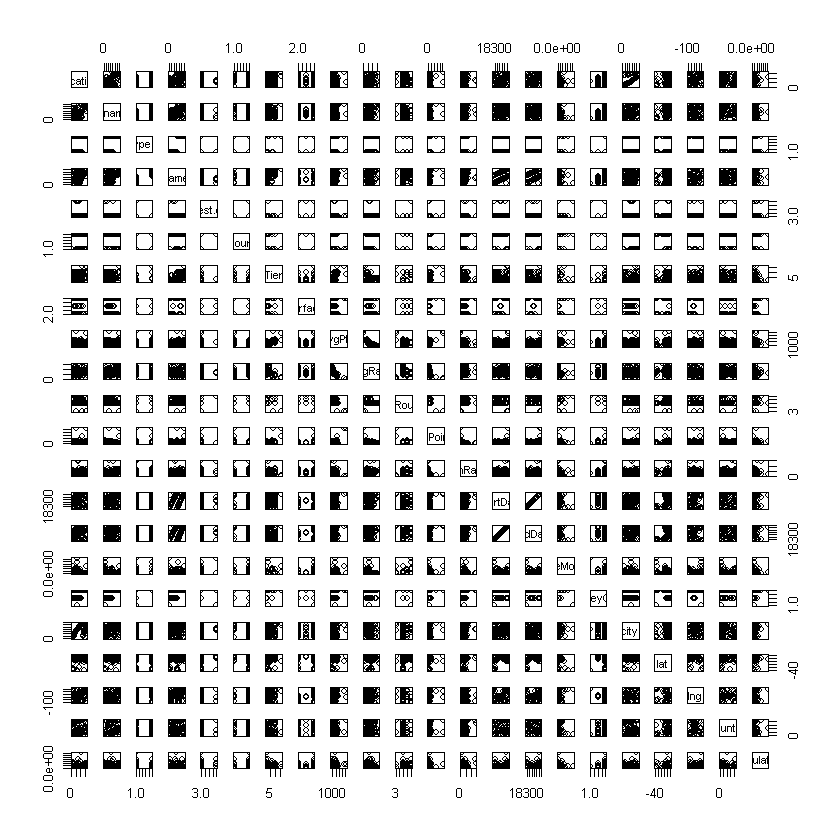

In [36]:
plot(FullTournaments)

#### Distributions
In this section the following distribution graphs will be shown and analysed:

- Distribution of Tournament Types

- Distribution of Set Types

- Distribution of Court Types

- Distribution of Surface Types

- Distribution of Tournament Tiers

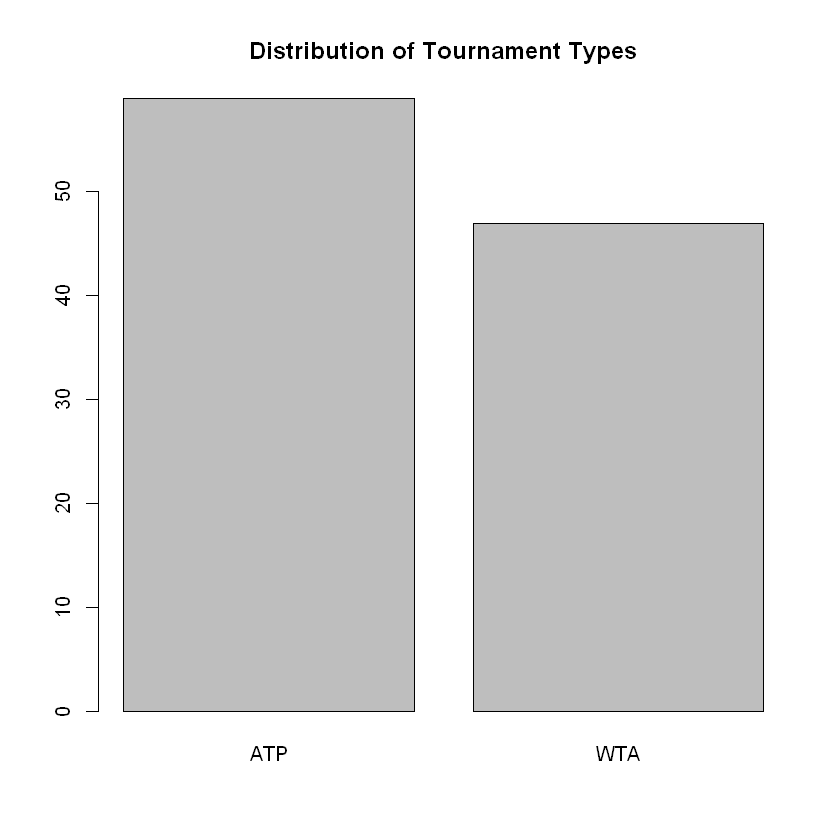

In [37]:
plot(FullTournaments$Type.x, main="Distribution of Tournament Types")

The above graph shows the breakdown between tournament types in the final dataset. As can be seen above, there are only two values for this column (ATP/WTA) and the ATP tour has a slightly higher amount of tournaments than the WTA

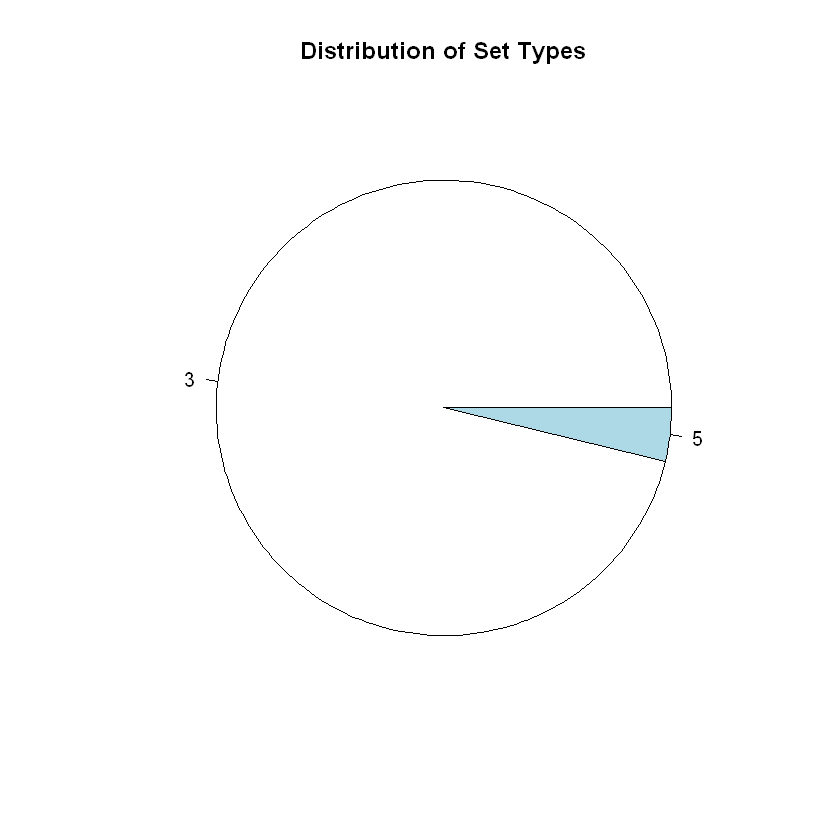

In [38]:
#plot(FullTournaments$Best.of)
slices <- c(nrow(filter(FullTournaments, Best.of == "3")),
nrow(filter(FullTournaments, Best.of == "5")))
lbls <- c("3", "5")
pie(slices, labels = lbls, main="Distribution of Set Types")

The above graph shows the breakdown of set types in the final dataset. As can be seen above, there are only two values for this column (3/5) and the majoriy of tournaments use the 3 set maximum rather than 5.

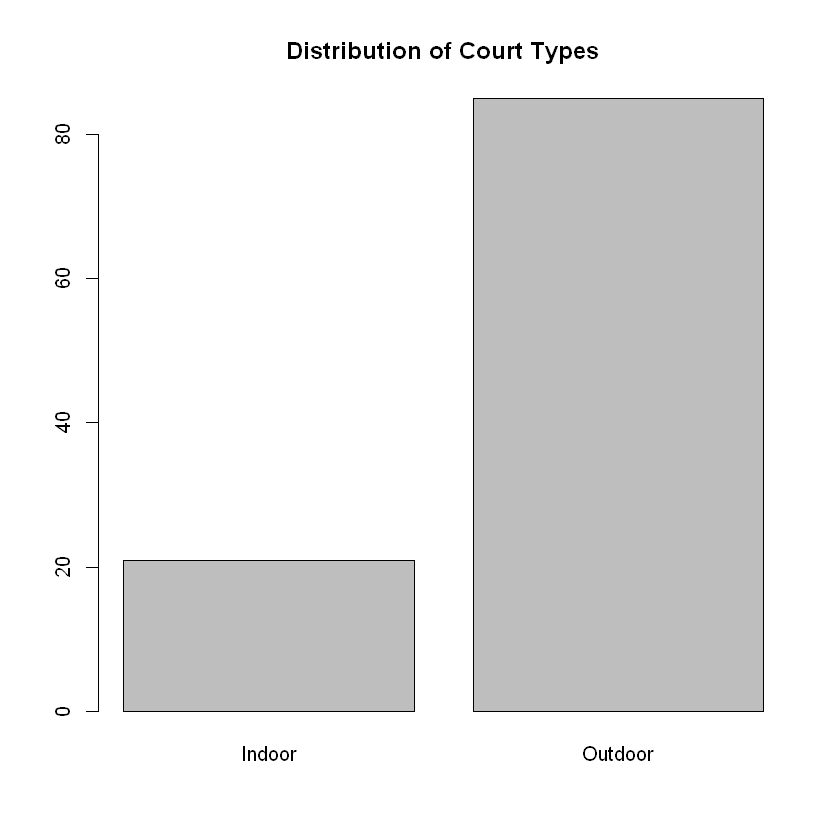

In [39]:
plot(FullTournaments$Court, main="Distribution of Court Types")

The above graph shows the breakdown between court types in the final dataset. As can be seen above, there are only two values for this column (Indoor/Outddor) and the majority of tournaments are held outdoors (4:1)

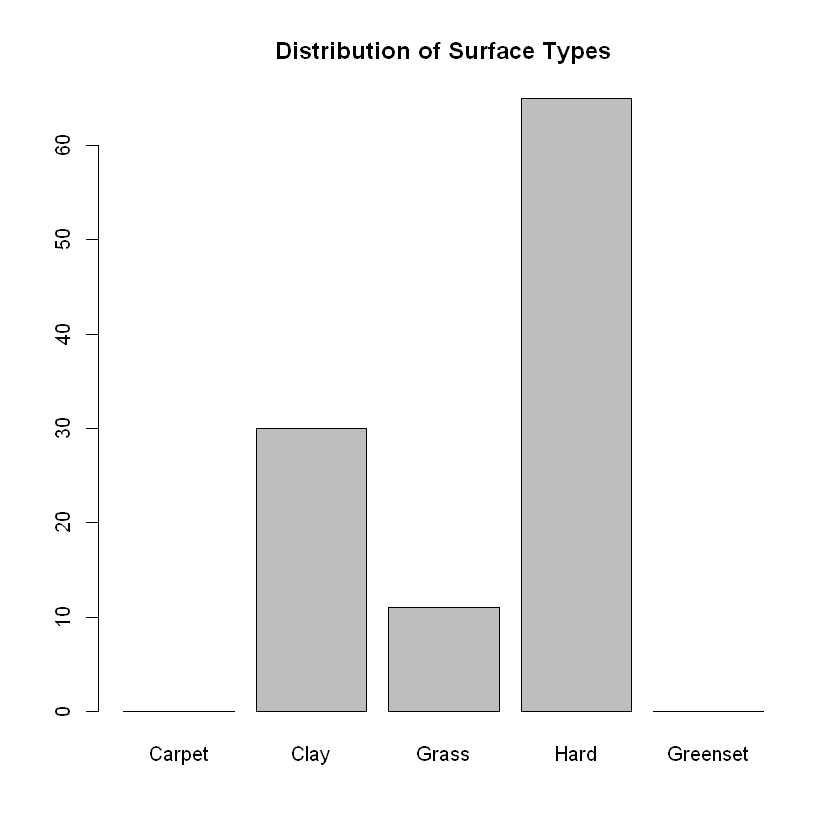

In [40]:
plot(FullTournaments$Surface, main="Distribution of Surface Types")

The above graph shows the breakdown between surface types in the final dataset. As can be seen above, there are only three non null values for this column (Clay, Grass and Hard). The Hard surface is the most used on the tour, followed by Clay and lastly Grass. The breakdown of the column is roughly (7:3:1) 

In [41]:
plot(FullTournaments$Tier, main="Distribution of Tournament Tiers")FullTournaments$Tier

ERROR: Error in parse(text = x, srcfile = src): <text>:1:68: unexpected symbol
1: plot(FullTournaments$Tier, main="Distribution of Tournament Tiers")FullTournaments
                                                                       ^


The above graph shows the breakdown between tournament tiers in the final dataset. As can be seen above, there are eight non null values for this column (ATP250, ATP500, Grand Slam, International, Masters 1000, Masters Cup, Premier and Tour Championships). The most common tier is ATP250 with the masters cup being the least common tier type. 

### Correlation
In this section the following correlation graphs will be shown and analysed:

- Start date vs Surface

- Type vs Best of

- Tier vs Best of

- Tier vs Prize money

- Tier vs Min points

- Tier vs Avg points

- Avg points vs Prize money

In [ ]:
plot(FullTournaments$startDate, FullTournaments$Surface, main="Start date vs Surface")

The above graph shows the correlation between the start date and surface columns. As can be seen in this graph the year is structured in seasons:

- The clay season starts in April and lasts 2 months running up until June. 
- The grass season starts at the end of the clay season and last a month ending in early July
- After this the hard court season starts and last 9 months running all the way back until april where the clay season starts back again.

There are a few tournaments which lie outside their respective seasons but these are outliers

In [ ]:
plot(FullTournaments$Type.x,FullTournaments$Best.of, main="Type vs Best.of")

plot(FullTournaments$Tier,FullTournaments$Best.of, main="Tier vs Best.of")

The above two graphs show the correlation between the set type column and the tournament type and tournament tier columns respectively. As can be seen in these graphs the only tournaments which currently use the 5 set maximum rule are Grand Slam tournaments on the ATP tour. All other tournament tiers and type combinations use the 3 set maximum rule

In [ ]:
plot(FullTournaments$Tier, FullTournaments$prizeMoney, main="Tier vs Prize Money")

plot(FullTournaments$Tier, FullTournaments$MinPoints, main="Tier vs Minimum Points")

plot(FullTournaments$Tier, FullTournaments$AvgPts, main="Tier vs Average Points")

The above three graphs show the correlation between the tier column and the prize money, minimum points and average points columns respectively. 

As can be seen in the above graphs:

- Grand Slams have the highest prize money
- The masters cup has the highest standard of competition
- The ATP 250 / International tournaments have the least competitive competition
- Minimum points isn't an accurate representation of standard as many tournaments offer wildcards who may have a very low ranking


In [ ]:
plot(FullTournaments$AvgPts, FullTournaments$prizeMoney, main="Average Points vs Prize Money")

The last correlation graph show the relationship between the Average Points and prize money columns. As can be seen in this graph, the relationships between these columns is roughly linear. With the exception of some outliers as the tournaments prize money increases so too does the average points of the competitiors competing.